In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Uploading dataset

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


# Drop the Days Column

In [3]:
data.drop('Days', axis = 1, inplace = True)

In [4]:
data

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


# Split the Dataset into X and Y

In [5]:
x = data.iloc[:, :-1].values
x = pd.DataFrame(x, columns = ["Outlook", "Temprature", "Routine"])
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [6]:
y = data.iloc[:, -1].values
y = pd.DataFrame(y, columns = ["Wear Jacket?"])
y

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes
5,No
6,No
7,No


# Encoding X and Y

## for features

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lb = LabelEncoder()

In [9]:
x1 = lb.fit_transform(x["Outlook"])
x2 = lb.fit_transform(x["Temprature"])
x3 = lb.fit_transform(x["Routine"])

In [10]:
x["Outlook"] = x1
x["Temprature"] = x2
x["Routine"] = x3

In [11]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


## for Label

In [12]:
y1 = lb.fit_transform(y)

c:\python 3.8.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
y1

array([0, 1, 0, 1, 1, 0, 0, 0])

# Fit the Model into Decition Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier()

In [16]:
dtc.fit(x, y1)

DecisionTreeClassifier()

In [17]:
y_pred = dtc.predict([[0, 1, 0]])

In [18]:
y_pred

array([0])

In [19]:
from sklearn import tree

[Text(372.0, 475.65000000000003, 'X[1] <= 0.5\ngini = 0.469\nsamples = 100.0%\nvalue = [0.625, 0.375]'),
 Text(279.0, 339.75, 'X[2] <= 0.5\ngini = 0.375\nsamples = 50.0%\nvalue = [0.25, 0.75]'),
 Text(186.0, 203.85000000000002, 'X[0] <= 0.5\ngini = 0.5\nsamples = 25.0%\nvalue = [0.5, 0.5]'),
 Text(93.0, 67.94999999999999, 'gini = 0.0\nsamples = 12.5%\nvalue = [0.0, 1.0]'),
 Text(279.0, 67.94999999999999, 'gini = 0.0\nsamples = 12.5%\nvalue = [1.0, 0.0]'),
 Text(372.0, 203.85000000000002, 'gini = 0.0\nsamples = 25.0%\nvalue = [0.0, 1.0]'),
 Text(465.0, 339.75, 'gini = 0.0\nsamples = 50.0%\nvalue = [1.0, 0.0]')]

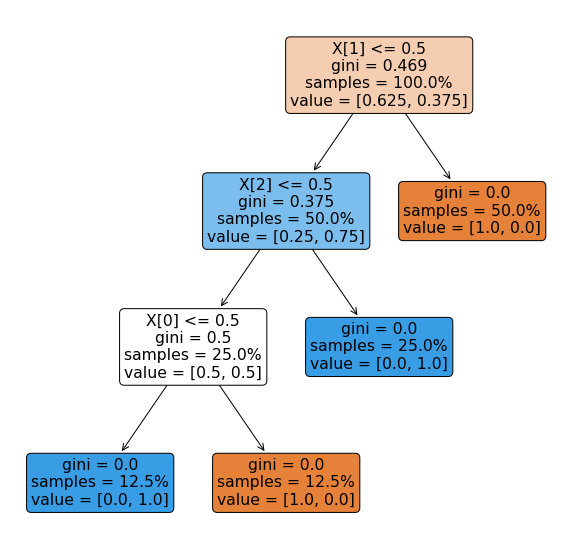

In [20]:
plt.figure(figsize= (10,10))
tree.plot_tree(dtc, filled = True, rounded= True, proportion= True)

<AxesSubplot:xlabel='Outlook', ylabel='count'>

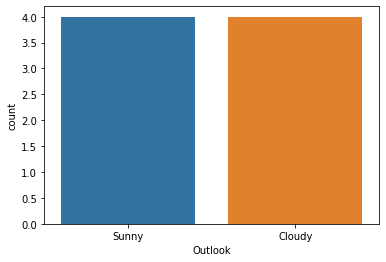

In [21]:
sns.countplot(x= "Outlook", data = data)

<AxesSubplot:xlabel='Outlook', ylabel='count'>

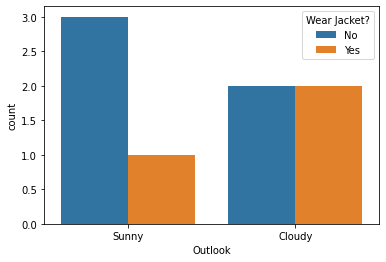

In [22]:
sns.countplot(x = "Outlook", hue = "Wear Jacket?", data = data)

<AxesSubplot:xlabel='Outlook', ylabel='count'>

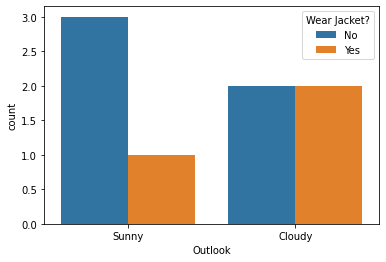

In [23]:
sns.countplot(x = "Outlook", hue = "Wear Jacket?", data = data)

<AxesSubplot:xlabel='Outlook', ylabel='count'>

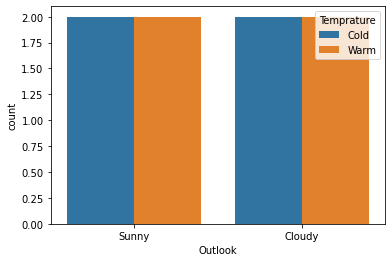

In [24]:
sns.countplot(x = "Outlook", hue = "Temprature", data = data)

<AxesSubplot:xlabel='Temprature', ylabel='count'>

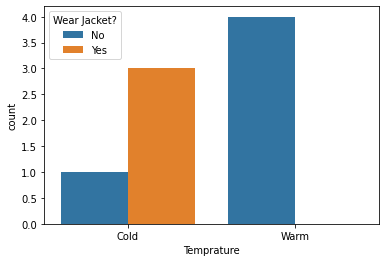

In [25]:
sns.countplot(x = "Temprature", hue = "Wear Jacket?", data = data)

<AxesSubplot:xlabel='count', ylabel='Routine'>

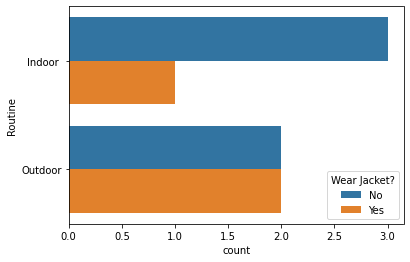

In [26]:
sns.countplot(y = "Routine", hue = "Wear Jacket?", data = data)

In [32]:
value = [lb.transform('Cloudy'), lb.transform('Cold'), lb.transform('Indoor')] # two dimension
dtc.predict(value)

ValueError: y should be a 1d array, got an array of shape () instead.